#VGG19

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
import os


In [ ]:
base_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical'
)


Found 1120 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layer VGG19 agar tidak dilatih ulang
base_model.trainable = False

# Tambahkan custom classification layer
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 716s 5s/step - accuracy: 0.4621 - loss: 1.6844 - val_accuracy: 0.8750 - val_loss: 0.5031
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 139s 757ms/step - accuracy: 0.8318 - loss: 0.5472 - val_accuracy: 0.9312 - val_loss: 0.2464
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 111s 757ms/step - accuracy: 0.9193 - loss: 0.3027 - val_accuracy: 0.9750 - val_loss: 0.1356
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 142s 762ms/step - accuracy: 0.9455 - loss: 0.1846 - val_accuracy: 0.9750 - val_loss: 0.1039
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 112s 769ms/step - accuracy: 0.9684 - loss: 0.1392 - val_accuracy: 0.9812 - val_loss: 0.1107
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 143s 766ms/step - accuracy: 0.9520 - loss: 0.1493 - val_accuracy: 0.9563 - val_loss: 0.1227
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 119s 806ms/step - accuracy: 0.9843 - loss: 0.0923 - val_accuracy: 0.9750 - val_loss: 0.1018
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 133s 735ms/step - accuracy: 0.9734 - loss: 0.0993 

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 1.0000 - loss: 0.0263
Test Accuracy: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Pastikan batch_size pada test_generator kecil untuk memudahkan evaluasi
test_generator.reset()  # Reset indeks generator jika diperlukan

# Prediksi probabilitas
y_pred_prob = model.predict(test_generator)

# Konversi ke kelas prediksi
y_pred = np.argmax(y_pred_prob, axis=1)

# Ambil label sebenarnya
y_true = test_generator.classes


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


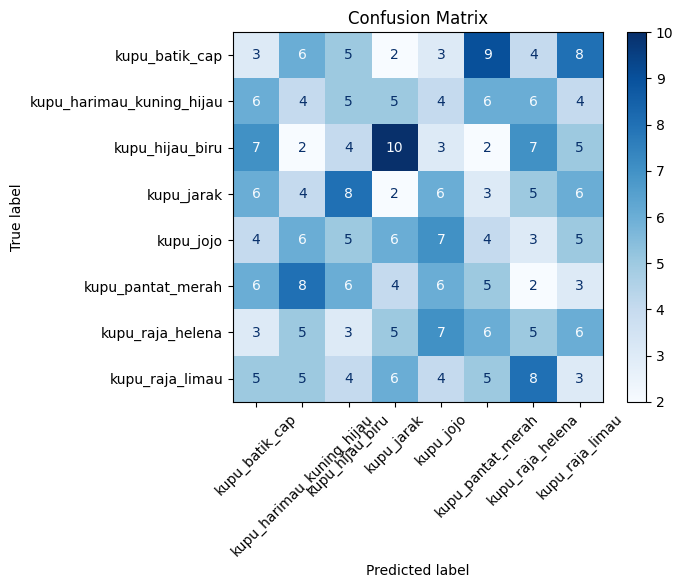

Classification Report:
                           precision    recall  f1-score   support

           kupu_batik_cap       0.07      0.07      0.07        40
kupu_harimau_kuning_hijau       0.10      0.10      0.10        40
          kupu_hijau_biru       0.10      0.10      0.10        40
               kupu_jarak       0.05      0.05      0.05        40
                kupu_jojo       0.17      0.17      0.17        40
        kupu_pantat_merah       0.12      0.12      0.12        40
         kupu_raja_helena       0.12      0.12      0.12        40
          kupu_raja_limau       0.07      0.07      0.07        40

                 accuracy                           0.10       320
                macro avg       0.10      0.10      0.10       320
             weighted avg       0.10      0.10      0.10       320



In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Dapatkan label kelas
class_labels = list(test_generator.class_indices.keys())

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

# Generate laporan lengkap
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))
